In [1]:
import pandas as pd
import jupyter_utils as j
import importlib

importlib.reload(j)

<module 'jupyter_utils' from '/home/bruno/GIT/stackoverflow/jupyter_utils.py'>

In [2]:
j.maximize()
j.display_all_colums(pd)

In [3]:
per_year_schema = 'data/.files/{}/survey_results_schema.csv'
per_year_results = 'data/.files/{}/survey_results_public.csv'

In [4]:
# Schema
df_schema_17 = pd.read_csv(per_year_schema.format(2017))
df_schema_18 = pd.read_csv(per_year_schema.format(2018))
df_schema_19 = pd.read_csv(per_year_schema.format(2019))

# Data
df_17 = pd.read_csv(per_year_results.format(2017), low_memory = False)
df_18 = pd.read_csv(per_year_results.format(2018), low_memory = False)
df_19 = pd.read_csv(per_year_results.format(2019), low_memory = False)

First, let's check how much questions we have each year.

In [5]:
df_schema_17.shape,df_schema_18.shape,df_schema_19.shape

((154, 2), (129, 2), (85, 2))

Since 2017, the number of questions is decreasing. 

#### Data Analysis

Let's explore the data to answer our questions.

In [6]:
print(f'Answers on 2017: {len(df_17)}')
print(f'Answers on 2018: {len(df_18)}')
print(f'Answers on 2019: {len(df_19)}')

print('\n')
print(f'To answer some of our questions, we end up having less than the total number of rows, since some of the wanted columns may be blank.')

Answers on 2017: 51392
Answers on 2018: 98855
Answers on 2019: 88883


To answer some of our questions, we end up having less than the total number of rows, since some of the wanted columns may be blank.


In [7]:
df_17.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [8]:
df_18.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [9]:
df_19.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

#### Q1 - The top 10 technologies per year?

The top 10 languages which the respondents work today.


In [10]:
df_17_q1 = df_17.dropna(subset = ['HaveWorkedLanguage'])
df_18_q1 = df_18.dropna(subset = ['LanguageWorkedWith'])
df_19_q1 = df_19.dropna(subset = ['LanguageWorkedWith'])

In [11]:
len(df_17_q1),len(df_18_q1),len(df_19_q1)

(36625, 78334, 87569)

In [12]:
languages_17 = []
languages_18 = []
languages_19 = []

In [13]:
df_17_q1['HaveWorkedLanguage'].apply(lambda col: languages_17.extend(col.split(';')))
df_18_q1['LanguageWorkedWith'].apply(lambda col: languages_18.extend(col.split(';')))
df_19_q1['LanguageWorkedWith'].apply(lambda col: languages_19.extend(col.split(';')))

print('OK')

OK


In [14]:
def trim(string):
    return string.rstrip().lstrip()

def parse_languages(languages):
    return list(map(trim, languages))

def count_ocurrencies(languages):
    language_ocurrencies = [ (languages.count(lang), lang) for lang in set(languages)]
    language_ocurrencies.sort(reverse=True)
    return language_ocurrencies

In [15]:
languages_17 = parse_languages(languages_17)
languages_18 = parse_languages(languages_18)
languages_19 = parse_languages(languages_19)

In [16]:
language_count_17 = count_ocurrencies(languages_17)
language_count_18 = count_ocurrencies(languages_18)
language_count_19 = count_ocurrencies(languages_19)

In [17]:
all_years_languages = list(set([ name for total,name in language_count_17 ] + [ name for total,name in language_count_18 ] + [ name for total,name in language_count_19 ]))
all_years_languages.sort()
all_years_languages

['Assembly',
 'Bash/Shell',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'Common Lisp',
 'Dart',
 'Delphi/Object Pascal',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'HTML/CSS',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Objective-C',
 'Ocaml',
 'Other(s):',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Smalltalk',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6',
 'WebAssembly']

In [18]:
all_years_languages.remove('Other(s):')

In [19]:
languages_per_year_df = pd.DataFrame({ 
    'LANGUAGE': all_years_languages,
    '2017': [0] * len(all_years_languages),
    '2018': [0] * len(all_years_languages),
    '2019' : [0] * len(all_years_languages),
})

In [20]:
# For an specific year and count, update the language dataframe
def update_per_year(year, language_count, language):
    _update_col = lambda row: count if row['LANGUAGE'] == language else row[year]
    for lang_count in language_count:
        count = lang_count[0]
        name = lang_count[1]
        if name == language:
            languages_per_year_df[year] = languages_per_year_df.apply(_update_col, axis = 1)         

# Update all languages per year
for language in all_years_languages:
    update_per_year('2019', language_count_19, language)
    update_per_year('2018', language_count_18, language)
    update_per_year('2017', language_count_17, language)

In [21]:
languages_per_year_df.head(10)

,LANGUAGE,2017,2018,2019
0,Assembly,1823,5760,5833
1,Bash/Shell,0,31172,0
2,Bash/Shell/PowerShell,0,0,31991
3,C,6974,18042,18017
4,C#,12476,26954,27097
5,C++,8155,19872,20524
6,CSS,0,50979,0
7,Clojure,391,1032,1254
8,Cobol,0,590,0
9,CoffeeScript,1192,2603,0


In [22]:
languages_per_year_df.sort_values(by = ['2019'], ascending = False).head(10)

,LANGUAGE,2017,2018,2019
23,JavaScript,22875,54686,59219
19,HTML/CSS,0,0,55466
36,SQL,18754,44670,47544
32,Python,11704,30359,36443
22,Java,14524,35521,35917
2,Bash/Shell/PowerShell,0,0,31991
4,C#,12476,26954,27097
30,PHP,10290,24071,23030
5,C++,8155,19872,20524
40,TypeScript,3488,13626,18523


In [23]:
languages_per_year_df.sort_values(by = ['2018'], ascending = False).head(10)

,LANGUAGE,2017,2018,2019
23,JavaScript,22875,54686,59219
18,HTML,0,53628,0
6,CSS,0,50979,0
36,SQL,18754,44670,47544
22,Java,14524,35521,35917
1,Bash/Shell,0,31172,0
32,Python,11704,30359,36443
4,C#,12476,26954,27097
30,PHP,10290,24071,23030
5,C++,8155,19872,20524


In [24]:
languages_per_year_df.sort_values(by = ['2017'], ascending = False).head(10)

,LANGUAGE,2017,2018,2019
23,JavaScript,22875,54686,59219
36,SQL,18754,44670,47544
22,Java,14524,35521,35917
4,C#,12476,26954,27097
32,Python,11704,30359,36443
30,PHP,10290,24071,23030
5,C++,8155,19872,20524
3,C,6974,18042,18017
40,TypeScript,3488,13626,18523
34,Ruby,3324,7911,7331


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

j.cfg_sns(sns)

def plot_technologies_per_year(languages_per_year_df, full_year_df, year):
    
    sns.set(style="ticks", color_codes=True)

    weight = 100 / len(full_year_df) 
    
    data = languages_per_year_df.copy()

    data = data.sort_values(by = [str(year)], ascending = False)[:10][['LANGUAGE', str(year)]]
    data.rename(columns = { 'LANGUAGE' : 'Language', str(year): 'Total' }, inplace = True)
    data['Total'] = data['Total'].apply(lambda c: c * weight)
  
    with sns.axes_style('whitegrid'):
        g = sns.catplot(x='Total', y='Language', kind='bar',
                    palette='pastel', edgecolor='.5', height=5, aspect=2, ci = None, legend = False,
                    data=data);
        
        g.set(xlim=(0, 75))
        for ax in g.axes.flat:
            xlabels = [( ('{:,.0f}'.format(x) + '%\n') if x != 0 else '0' ) for x in ax.get_xticks()]
        g.set_xticklabels(xlabels, rotation = 0)

        plt.title('The top 10 technologies on {year}{nl}'.format(year=year, nl='\n'))
        g.set_ylabels('Technology{nl}'.format(nl='\n'))
        g.set_xlabels('{nl}%'.format(nl='\n'))

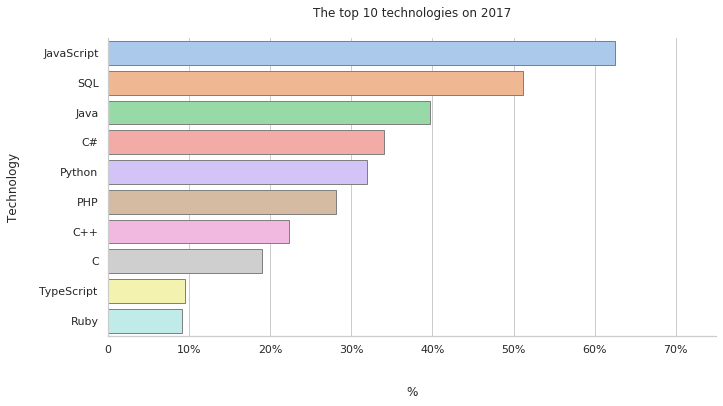

In [26]:
plot_technologies_per_year(languages_per_year_df, df_17_q1, 2017)

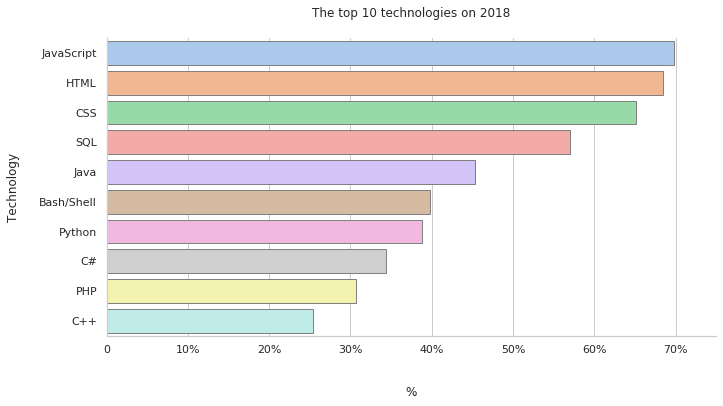

In [27]:
plot_technologies_per_year(languages_per_year_df, df_18_q1, 2018)

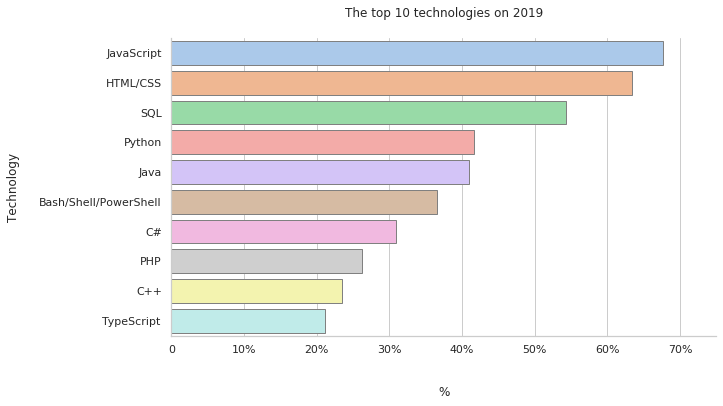

In [28]:
plot_technologies_per_year(languages_per_year_df, df_19_q1, 2019)

In [29]:
langs = []

def unify_name(name):
    
    map_names = {
        'CSS' : 'HTML/CSS',
        'HTML' : 'HTML/CSS',
        'Bash/Shell' : 'Bash/Shell/PowerShell'
    }
    
    return map_names.get(name, name)

for lang in language_count_19:
    langs.append({
        'language' : unify_name(lang[1]),
        'total' : (100/len(df_19_q1)) * lang[0],
        'year' : 2019
    })
for lang in language_count_18:
    langs.append({
        'language' : unify_name(lang[1]),
        'total' : (100/len(df_18_q1)) * lang[0],
        'year' : 2018
    })
for lang in language_count_17:
    langs.append({
        'language' : unify_name(lang[1]),
        'total' : (100/len(df_17_q1)) * lang[0],
        'year' : 2017
    })

In [30]:
def cfg_sns(sns):
    sns.set(rc = {
            'figure.figsize': (11.7,8.27),
            'font.size': 20,
            'axes.titlesize': 20,
            'axes.labelsize': 20
        }, style='white')
    sns.set(font_scale=1.5)

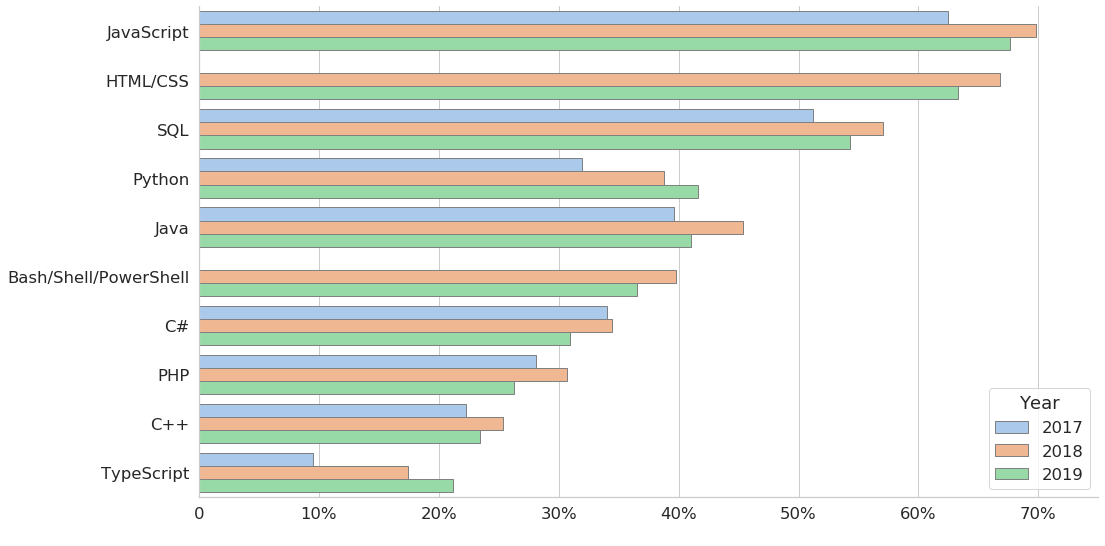

In [31]:
df = pd.DataFrame(langs)

cfg_sns(sns)

# take for reference the top technologies on 2019
top_lang = list(df[df.year == 2019].sort_values(by = ['total'], ascending = False)[:10].language.values)

with sns.axes_style('whitegrid'):
    g = sns.catplot(x='total', y='language', hue='year', kind='bar',
                palette='pastel', edgecolor='.5', height=8, aspect=2, ci = None, legend = False,
                data=df[df.language.isin(top_lang)].sort_values(by = ['year', 'total'], ascending = False));
    
    g.set(xlim=(0, 75))
    for ax in g.axes.flat:
        xlabels = [( ('{:,.0f}'.format(x) + '%\n') if x != 0 else '0' ) for x in ax.get_xticks()]
    g.set_xticklabels(xlabels, rotation = 0)
    
    plt.legend(title='Year', labels=['2017', '2018', '2019'])
    
    g.set_ylabels('')
    g.set_xlabels('')

#### Q2 - Equality: how the Salary relates to gender?

Can we have an idea about gender equality in technology?

In [32]:
df_17['Gender'].value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female                                                  15
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Female; Transgender

In [33]:
df_18['Gender'].value_counts()

Male                                                                         59458
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                                             145
Male;Non-binary, genderqueer, or gender non-conforming                         128
Transgender                                                                    105
Female;Male                                                                     98
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Male;Transgender                                                                29
Female;Transgender;Non-binary, genderqueer, or gender non-conforming            24
Fema

In [34]:
df_19['Gender'].value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

#### Salary - Missing values analysis

In [35]:
df_17['Salary'].isnull().mean()

0.7491632938978829

In [36]:
df_18['ConvertedSalary'].isnull().mean()

0.5174548581255374

In [37]:
df_19['ConvertedComp'].isnull().mean()

0.3719496416637602

In [39]:
df_17_q2 = df_17.dropna(subset = ['Gender', 'Salary'])
df_18_q2 = df_18.dropna(subset = ['Gender', 'ConvertedSalary'])
df_19_q2 = df_19.dropna(subset = ['Gender', 'ConvertedComp'])

In [40]:
len(df_18_q2[df_18_q2.Gender.isin(['Female'])].sort_values(by = ['ConvertedSalary'], ascending = False))

2649

In [101]:
df_17_q2[df_17_q2.Salary < 10].sort_values(by = ['Salary'], ascending = False)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
47343,47344,Professional developer,"Yes, both",Colombia,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"More than half, but not all, the time","5,000 to 9,999 employees","Privately-held limited company, not in startup...",9 to 10 years,9 to 10 years,NaN,Mobile developer,NaN,iOS; Android; Windows Phone,NaN,10.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I'm not actively looking, but I am open to new...",3.0,Less than a year ago,Important,Very important,Important,Very important,Very important,Very important,Somewhat important,Important,Very important,Very important,Important,Somewhat important,Not very important,Somewhat important,Not very important,Health benefits; Equipment; Professional devel...,Yes,LinkedIn,I was just giving it a regular update,I was contacted directly by someone at the com...,Not very important,Important,Important,Somewhat important,Somewhat important,Important,Important,Not at all important,Not very important,Important,U.S. dollars ($),Neither underpaid nor overpaid,Tabs,Not very important,Online course; On-the-job training; Hackathon;...,NaN,NaN,NaN,10:00 AM,Java; JavaScript; Objective-C,Java; JavaScript; Swift,React; Cordova,AngularJS; React,MySQL; PostgreSQL; SQLite,Mongo

In [103]:
df_18_q2.sort_values(by = ['ConvertedSalary'], ascending = False)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
48915,69405,Yes,Yes,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Data or business analyst,3-5 years,0-2 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,5.0,6.0,2.0,4.0,10.0,9.0,3.0,7.0,1.0,8.0,11.0,8.0,10.0,7.0,2.0,9.0,4.0,5.0,6.0,1.0,3.0,1.0,2.0,5.0,3.0,4.0,6.0,1.0,7.0,3.0,2.0,5.0,4.0,My job status or other personal status changed,U.S. dollars ($),58000,Weekly,2000000.0,USD,"Office / productivity suite (Microsoft Office,...",One to three months,"Taught yourself a new language, framework, or ...",A college/university computer science or softw...,NaN,To improve my general technical skills or prog...,Strongly agree,Agree,Agree,C#;Ruby;SQL;HTML;CSS;Bash/Shell,C#;CoffeeScript;Go;Haskell;Ruby;Rust;SQL;Swift,PostgreSQL;SQLite,"PostgreSQL;SQLite;Microsoft Azure (Tables, Cos...",Heroku;Windows Desktop or Server,AWS;Azure;Heroku,.NET Core;Node.js;Xamarin,.NET Core;Node.js;Xamarin,Atom;Eclipse;Visual Studio;Visual Studio Code,Windows,4,Agile;Extreme programming (XP);Pair programmin...,Git,A few times per week,Yes,Yes,The website I was visiting asked me to disable...,Strongly agree,Strongly agree,Strongly disagree,Clicked on an online advertisement,1.0,4.0,2.0,6.0,5.0,7.0,3.0,"Evolving definitions of ""fairness"" in algorith...",Increasing automation of jobs,A governmental or other regulatory body,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per week,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...","No, I know what it is but I don't have one",NaN,I'm not sure,Somewhat interested,A little bit interested,A little bit interested,Very interested,Very interested,Between 7:01

#### Notes about salary

- There are a few outliers, with a salary equal to $ USD 2 million or even zero. 

In [41]:
df_18_q2[(df_18_q2.ConvertedSalary < 2000000) & (df_18_q2.ConvertedSalary > 0) ].sort_values(by = ['ConvertedSalary'], ascending = False).groupby('Gender').agg(avg_salary = ('ConvertedSalary', 'mean')).reset_index()

,Gender,avg_salary
0,Female,83087.284174
1,Female;Male,46281.350000
2,"Female;Male;Non-binary, genderqueer, or gender...",47984.000000
3,Female;Male;Transgender,40960.750000
4,"Female;Male;Transgender;Non-binary, genderquee...",94306.176471
5,"Female;Non-binary, genderqueer, or gender non-...",98701.975000
6,Female;Transgender,92077.821053
7,"Female;Transgender;Non-binary, genderqueer, or...",92036.200000
8,Male,88837.921838
9,"Male;Non-binary, genderqueer, or gender non-co...",72921.630435


In [42]:
df_17.sort_values(by = ['Salary'], ascending = False).head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
31600,31601,Professional developer,No,United States,"Yes, part-time",Employed full-time,Doctoral degree,Computer science or software engineering,Never,500 to 999 employees,"Privately-held limited company, not in startup...",20 or more years,14 to 15 years,NaN,Mobile developer; Machine learning specialist;...,NaN,NaN,NaN,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,1.0,More than 4 years ago,Somewhat important,Important,Very important,Important,Somewhat important,Somewhat important,Very important,Not very important,Somewhat important,Not at all important,Not very important,Important,Not very important,Somewhat important,Somewhat important,Retirement; Annual bonus; Health benefits; Pri...,No,LinkedIn,I was just giving it a regular update,"A friend, family member, or former colleague t...",Important,Somewhat important,Important,Not at all important,Somewhat important,Somewhat important,Somewhat important,Very important,Not at all important,Very important,U.S. dollars ($),Somewhat underpaid,Spaces,Very important,Online course; Part-time/evening course; Indus...,Stack Overflow Q&A; Other,NaN,Return to college; Master's degree,10:00 AM,Java; Python; R; Scala,Java; R,Hadoop; Spark,Hadoop; Spark,SQLite,Na

In [43]:
df_17_q2['Gender'] = df_17_q2.Gender.apply(lambda c: c if c in ['Male', 'Female'] else 'Other')
df_18_q2['Gender'] = df_18_q2.Gender.apply(lambda c: c if c in ['Male', 'Female'] else 'Other')
df_19_q2['Gender'] = df_19_q2.Gender.apply(lambda c: c if c in ['Man', 'Woman'] else 'Other')

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [44]:
len(df_17_q2[df_17_q2.Gender.isin(['Female'])])

819

In [45]:
df_17_q2_avg_sal = df_17_q2[df_17_q2.Gender.isin(['Female', 'Male'])].groupby('Gender').agg(avg_salary = ('Salary', 'mean')).reset_index()
df_17_q2_avg_sal['year'] = 2017
df_18_q2_avg_sal = df_18_q2[df_18_q2.Gender.isin(['Female', 'Male'])].groupby('Gender').agg(avg_salary = ('ConvertedSalary', 'mean')).reset_index()
df_18_q2_avg_sal['year'] = 2018
df_19_q2_avg_sal = df_19_q2[df_19_q2.Gender.isin(['Man', 'Woman'])].groupby(['Gender']).agg(avg_salary = ('ConvertedComp', 'mean')).reset_index()
df_19_q2_avg_sal['year'] = 2019

In [46]:
df_gender_avg_salary = pd.concat([ df_17_q2_avg_sal, df_18_q2_avg_sal, df_19_q2_avg_sal])
df_gender_avg_salary.Gender = df_gender_avg_salary.Gender.apply(lambda c: 'Man' if c == 'Male' else ('Woman' if c == 'Female' else c))
df_gender_avg_salary.head(6)

,Gender,avg_salary,year
0,Woman,58083.924534,2017
1,Man,56996.494293,2017
0,Woman,88251.293696,2018
1,Man,96477.073996,2018
0,Man,127458.181969,2019
1,Woman,114864.175970,2019


/home/bruno/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


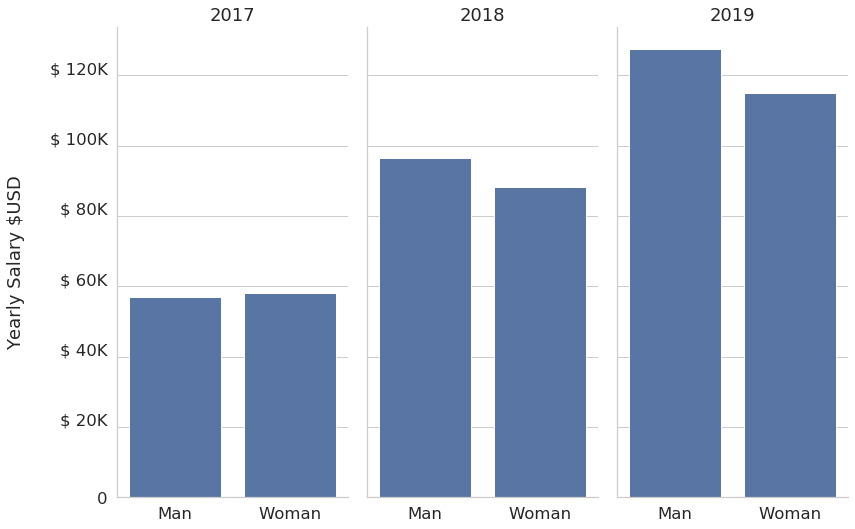

In [47]:
with sns.axes_style('whitegrid'):
    g = sns.FacetGrid(df_gender_avg_salary.sort_values(by = ['Gender'], ascending = True), col = 'year', height=8, aspect=.5)
    g.map(sns.barplot, 'Gender', 'avg_salary');
 
    g.axes.flat[0].set_title('2017')
    g.axes.flat[1].set_title('2018')
    g.axes.flat[2].set_title('2019')

    for ax in g.axes.flat:
        ylabels = [( ('$ {:,.0f}'.format(x) + 'K\n') if x != 0 else '0' ) for x in ax.get_yticks()/1000]
    g.set_yticklabels(ylabels, rotation = 0)
    
    g.set_ylabels('Yearly Salary $USD\n')
    g.axes.flat[0].set_xlabel('')
    g.axes.flat[1].set_xlabel('')
    g.axes.flat[2].set_xlabel('')

Let's check if the difference between salaries is related to years of coding.

In [48]:
y_code_19 = df_19_q2.copy()
y_code_19 = y_code_19.dropna(subset = ['YearsCodePro'])

def years_code(years):
    
    years_map = {
        'Less than 1 year' : 1,
        'More than 50 years' : 50
    }
    
    _years = years_map.get(years, None)
    years = _years if _years is not None else int(str(years))
    
    if years <= 1:
        return '1' # one year or less
    
    if years <= 2:
        return '2' # two years or less
    
    return '3+' # three years or more

y_code_19['years_of_code'] = y_code_19.YearsCodePro.apply(lambda c: years_code(c))
y_code_19.years_of_code.value_counts()

3+    43266
2      5809
1      5670
Name: years_of_code, dtype: int64

In [49]:
y_code_19 = y_code_19[y_code_19.Gender.isin(['Man', 'Woman'])].groupby(['Gender', 'years_of_code']).agg(avg_salary = ('ConvertedComp', 'mean')).reset_index()
y_code_19.head(6)

,Gender,years_of_code,avg_salary
0,Man,1,87825.273892
1,Man,2,90876.065539
2,Man,3+,136957.979066
3,Woman,1,87432.802068
4,Woman,2,81979.504425
5,Woman,3+,129983.619960


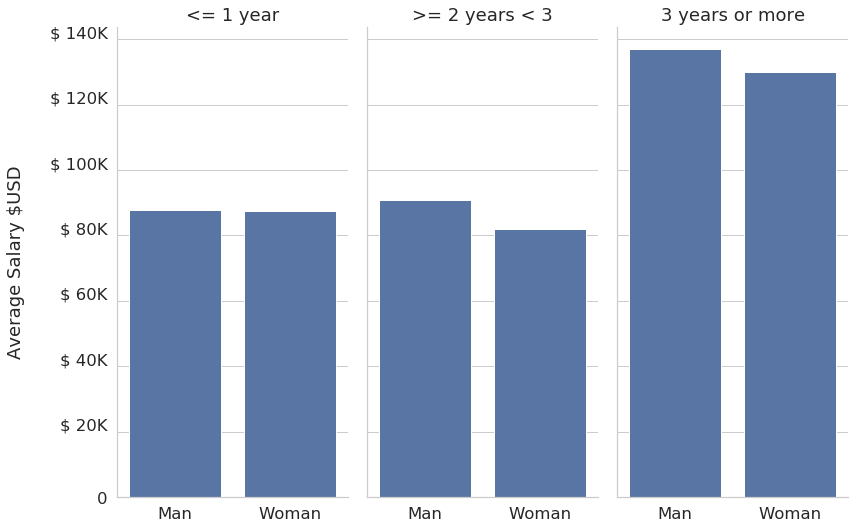

In [50]:
with sns.axes_style('whitegrid'):
    g = sns.FacetGrid(y_code_19.sort_values(by = ['Gender', 'years_of_code']), col = 'years_of_code', height=8, aspect=.5)
    g.map(sns.barplot, 'Gender', 'avg_salary');
 
    g.axes.flat[0].set_title('<= 1 year')
    g.axes.flat[1].set_title('>= 2 years < 3')
    g.axes.flat[2].set_title('3 years or more')

    for ax in g.axes.flat:
        ylabels = [( ('$ {:,.0f}'.format(x) + 'K\n') if x != 0 else '0' ) for x in ax.get_yticks()/1000]
    g.set_yticklabels(ylabels, rotation = 0)
    
    g.set_ylabels('Average Salary $USD\n')
    g.axes.flat[0].set_xlabel('')
    g.axes.flat[1].set_xlabel('')
    g.axes.flat[2].set_xlabel('')

In [51]:
y_code_18 = df_18_q2[df_18_q2.Gender.isin(['Male', 'Female']) & (df_18_q2.Country.isin(['United States']))].groupby(['Gender', 'YearsCodingProf']).agg(avg_salary = ('ConvertedSalary', 'mean')).reset_index()
y_code_18.sort_values(by = ['YearsCodingProf'])

,Gender,YearsCodingProf,avg_salary
0,Female,0-2 years,90280.970326
11,Male,0-2 years,125427.623661
1,Female,12-14 years,153311.095238
12,Male,12-14 years,159567.024938
2,Female,15-17 years,167766.833333
13,Male,15-17 years,187484.719355
3,Female,18-20 years,161791.176471
14,Male,18-20 years,166681.934307
4,Female,21-23 years,106263.157895
15,Male,21-23 years,169784.653959


#### Q3 - Is the wish of learning a new technology a good indicator of a technology growing in the next year?


In [52]:
df_17_q3 = df_17.dropna(subset = ['WantWorkLanguage'])
df_18_q3 = df_18.dropna(subset = ['LanguageDesireNextYear'])
df_19_q3 = df_19.dropna(subset = ['LanguageDesireNextYear'])

In [53]:
desired_languages_17 = []
desired_languages_18 = []
desired_languages_19 = []

# Split
df_17_q3.WantWorkLanguage.apply(lambda col: desired_languages_17.extend(col.split(';')))
df_18_q3.LanguageDesireNextYear.apply(lambda col: desired_languages_18.extend(col.split(';')))
df_19_q3.LanguageDesireNextYear.apply(lambda col: desired_languages_19.extend(col.split(';')))

desired_languages_17 = parse_languages(desired_languages_17)
desired_languages_18 = parse_languages(desired_languages_18)
desired_languages_19 = parse_languages(desired_languages_19)

In [54]:
# Count
desired_language_count_17 = count_ocurrencies(desired_languages_17)
desired_language_count_18 = count_ocurrencies(desired_languages_18)
desired_language_count_19 = count_ocurrencies(desired_languages_19)

In [55]:
desired_language_count_19

[(44739, 'JavaScript'),
 (40006, 'Python'),
 (36645, 'HTML/CSS'),
 (33566, 'SQL'),
 (23720, 'TypeScript'),
 (23508, 'Java'),
 (22449, 'C#'),
 (21303, 'Bash/Shell/PowerShell'),
 (17060, 'Go'),
 (16856, 'C++'),
 (13261, 'Kotlin'),
 (12837, 'PHP'),
 (11143, 'C'),
 (10497, 'Rust'),
 (8800, 'Swift'),
 (8440, 'WebAssembly'),
 (7912, 'Other(s):'),
 (7251, 'Ruby'),
 (6734, 'R'),
 (5562, 'Scala'),
 (4659, 'Assembly'),
 (4429, 'Dart'),
 (3788, 'Elixir'),
 (3521, 'F#'),
 (2851, 'Objective-C'),
 (2752, 'Clojure'),
 (2124, 'Erlang'),
 (1641, 'VBA')]

#### What really is a new technology?

To answer this question, let's consider a new technology if the developer doesn't work today with the technology he answered as desired technology for the next year.

In [56]:
df_17_q3 = df_17.dropna(subset = ['WantWorkLanguage'])
df_18_q3 = df_18.dropna(subset = ['LanguageDesireNextYear'])

In [57]:
df_17_q1 = df_17.dropna(subset = ['HaveWorkedLanguage'])
df_18_q1 = df_18.dropna(subset = ['LanguageWorkedWith'])

In [58]:
def add_new_languages(worked_l, want_work_l, languages_list):
    
    want_work_languages = parse_languages(str(want_work_l).split(';'))
    worked_languages = parse_languages(str(worked_l).split(';'))
    
    for new_language in want_work_languages:
        if new_language not in worked_languages:
            languages_list.append(new_language)
            

In [59]:
true_new_languages_17 = []
true_new_languages_18 = []
true_new_languages_19 = []

In [60]:
df_17_q3.apply(lambda row: add_new_languages(row.HaveWorkedLanguage, row.WantWorkLanguage, true_new_languages_17), axis = 1)
df_18_q3.apply(lambda row: add_new_languages(row.LanguageWorkedWith, row.LanguageDesireNextYear, true_new_languages_18), axis = 1)
df_19_q3.apply(lambda row: add_new_languages(row.LanguageWorkedWith, row.LanguageDesireNextYear, true_new_languages_19), axis = 1)

print('OK')

OK


In [61]:
new_languages = []

for lang in count_ocurrencies(true_new_languages_19):
    new_languages.append({
        'language' : unify_name(lang[1]),
        'total' : (100/len(true_new_languages_19)) * lang[0],
        'year' : 2019
    })
for lang in count_ocurrencies(true_new_languages_18):
    new_languages.append({
        'language' : unify_name(lang[1]),
        'total' : (100/len(true_new_languages_18)) * lang[0],
        'year' : 2018
    })
for lang in count_ocurrencies(true_new_languages_17):
    new_languages.append({
        'language' : unify_name(lang[1]),
        'total' : (100/len(true_new_languages_17)) * lang[0],
        'year' : 2017
    })

In [62]:
new_languages

[{'language': 'Python', 'total': 10.27514187723966, 'year': 2019},
 {'language': 'Go', 'total': 9.35620799434029, 'year': 2019},
 {'language': 'TypeScript', 'total': 7.829009089371127, 'year': 2019},
 {'language': 'Kotlin', 'total': 7.061564725242614, 'year': 2019},
 {'language': 'Rust', 'total': 6.27874071453838, 'year': 2019},
 {'language': 'WebAssembly', 'total': 5.948078313160363, 'year': 2019},
 {'language': 'C++', 'total': 4.753079774226788, 'year': 2019},
 {'language': 'JavaScript', 'total': 3.986404392427062, 'year': 2019},
 {'language': 'Swift', 'total': 3.7126466833792158, 'year': 2019},
 {'language': 'Java', 'total': 3.3335383952876763, 'year': 2019},
 {'language': 'C#', 'total': 3.3089309607665216, 'year': 2019},
 {'language': 'R', 'total': 3.170514141585026, 'year': 2019},
 {'language': 'Scala', 'total': 2.792943818151059, 'year': 2019},
 {'language': 'Ruby', 'total': 2.7398840374648192, 'year': 2019},
 {'language': 'C', 'total': 2.682979345134649, 'year': 2019},
 {'langua

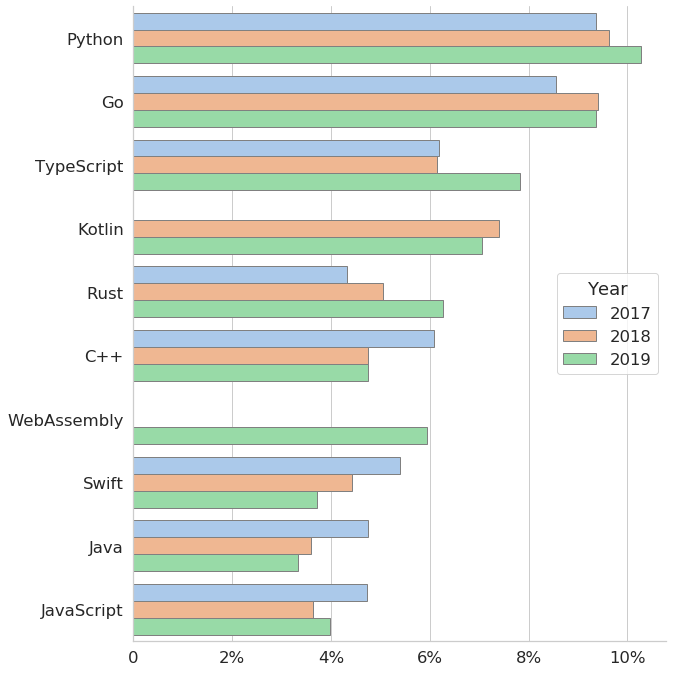

In [63]:
df = pd.DataFrame(new_languages)
df_19 = df[df.year.isin([2019])]
top_10 = list(df_19[df_19.year.isin([2019])][:10].language.values)

with sns.axes_style('whitegrid'):
    g = sns.catplot(x='total', y='language', hue='year', kind='bar',
                palette='pastel', edgecolor='.5', height=10, aspect=1, ci = None, legend = False,
                data=df[df.language.isin(top_10)].sort_values(by = ['total'], ascending = False));
    
    for ax in g.axes.flat:
        xlabels = [( ('{:,.0f}'.format(x) + '%\n') if x != 0 else '0' ) for x in ax.get_xticks()]
        g.set_xticklabels(xlabels, rotation = 0)
    
    g.set_ylabels('')
    g.set_xlabels('')
    plt.legend(title='Year', labels=['2017', '2018', '2019'], loc = 'center right')

In [64]:
lang_dev = []

lang_2019 = list(filter(lambda row: row['year'] == 2019, langs))

for tech in list(filter(lambda row: row['year'] == 2018, langs)):
    next_year_lang = list(filter(lambda row: row['language'] == tech['language'], lang_2019))
    next_year_estimated_growth = list(filter(lambda row: row['language'] == tech['language'] and row['year'] == 2018, new_languages))
    
    if len(next_year_lang) == 0:
        continue
    
    tech['growth'] = next_year_lang[0]['total'] - tech['total']
    tech['estimated_growth'] = next_year_estimated_growth[0]['total'] if len(next_year_estimated_growth) > 0 else 0
    lang_dev.append(tech)

In [66]:
df = pd.DataFrame(lang_dev) 
df.sort_values(by = ['growth'], ascending = False)[['language', 'growth', 'estimated_growth']]

,language,growth,estimated_growth
11,TypeScript,3.757717,6.142294
6,Python,2.860485,9.622901
19,Kotlin,1.939536,7.405092
15,Go,1.161162,9.414809
21,Rust,0.820009,5.057522
18,VBA,0.595906,0.242115
23,Clojure,0.114578,1.657620
24,Erlang,-0.243754,1.853053
22,F#,-0.312268,2.442517
17,R,-0.379606,3.689491


In [73]:
languages = []

for l in lang_dev:
    
    languages.append({
        'language' : l['language'],
        'type' : 'Growth',
        'value' : l['growth']
    })
    
    languages.append({
        'language' : l['language'],
        'type' : 'Estimated growth',
        'value' : l['estimated_growth']
    })

In [90]:
languages_df = pd.DataFrame(languages)

top_10_lang = list(languages_df[languages_df.type.isin(['Growth'])].sort_values(by = ['value'], ascending = False)[:10].language.values)

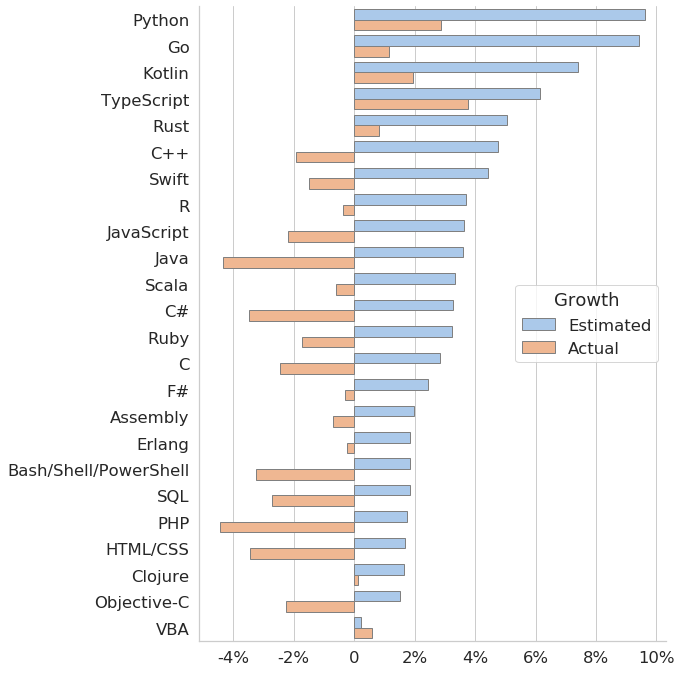

In [99]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(x='value', y='language', hue='type', kind='bar',
                palette='pastel', edgecolor='.5', height=10, aspect=1, ci = None, legend = False,
                data=languages_df.sort_values(by = ['value'], ascending = False));
                # data=languages_df[languages_df.language.isin(top_10_lang)].sort_values(by = ['value'], ascending = False));
    
    for ax in g.axes.flat:
        xlabels = [( ('{:,.0f}'.format(x) + '%\n') if x != 0 else '0' ) for x in ax.get_xticks()]
        g.set_xticklabels(xlabels, rotation = 0)
    
    g.set_ylabels('')
    g.set_xlabels('')
    plt.legend(title='Growth', labels=['Estimated', 'Actual'], loc = 'center right')